In [12]:
import matplotlib.pyplot as plt
import pandas as pd

from statscantools.table import Table
from statscantools.wds import wds_fetch_table

pd.set_option('display.float_format', '{:.2f}'.format)

In [17]:
wds_fetch_table('18100251')
table = Table('18100251')
print('Title : ', table.title)
print(table.dimensions)

File found
Title :  Retail services price index, monthly
   Dimension ID                                     Dimension name
0             1                                          Geography
1             2  North American Industry Classification System ...


In [18]:
df = table.merged_dataframe
df.head()
del(table)

In [19]:
print(df[['dim_1', 'dim_2']].nunique())
# the data has the same value for dim 1, so only 1 dimension in the dataset

dim_1     1
dim_2    89
dtype: int64


In [20]:
cols = ['ref_date', 'geo', 'north american industry classification system (naics)', 'uom', 'value',
        'dim_2_Member ID','dim_2_Parent Member ID', 'dim_2_depth']

df = df[cols].copy()

In [28]:
df['dim_2_depth'].unique()
# We have 4 levels for granularity

array([1, 2, 3, 4])

In [29]:
new_df = df[df['dim_2_depth'] == 2].copy()
new_df.head(15)

,ref_date,geo,north american industry classification system (naics),uom,value,dim_2_Member ID,dim_2_Parent Member ID,dim_2_depth
0,2008-01,Canada,Retail trade [44-45],"Index, 2013=100",87.70,1,NaN,1
84,2008-02,Canada,Retail trade [44-45],"Index, 2013=100",88.30,1,NaN,1
168,2008-03,Canada,Retail trade [44-45],"Index, 2013=100",88.90,1,NaN,1
252,2008-04,Canada,Retail trade [44-45],"Index, 2013=100",89.40,1,NaN,1
336,2008-05,Canada,Retail trade [44-45],"Index, 2013=100",89.80,1,NaN,1
420,2008-06,Canada,Retail trade [44-45],"Index, 2013=100",90.80,1,NaN,1
504,2008-07,Canada,Retail trade [44-45],"Index, 2013=100",91.00,1,NaN,1
588,2008-08,Canada,Retail trade [44-45],"Index, 2013=100",91.10,1,NaN,1
672,2008-09,Canada,Retail trade [44-45],"Index, 2013=100",91.60,1,NaN,1
756,2008-10,Canada,Retail trade [44-45],"Index, 2013=100",91.70,1,NaN,1


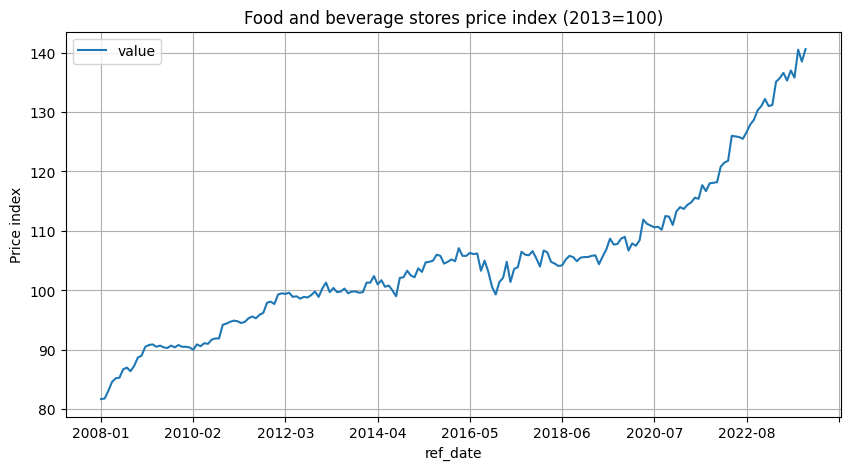

In [9]:
food = df[df['north american industry classification system (naics)'] == 'Food and beverage stores [445]']
food.plot(x='ref_date', y='value', figsize=(10,5))
plt.ylabel('Price index')
plt.title('Food and beverage stores price index (2013=100)')
plt.grid()
plt.show()

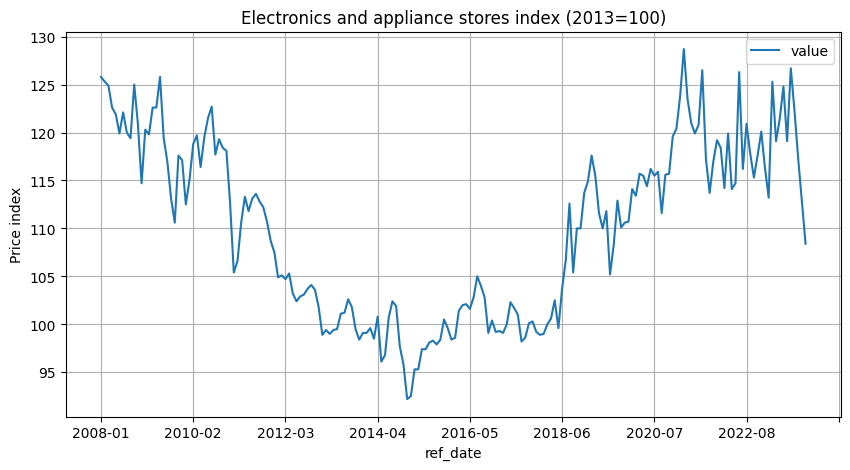

In [11]:
food = df[df['north american industry classification system (naics)'] == 'Electronics and appliance stores [443]']
food.plot(x='ref_date', y='value', figsize=(10,5))
plt.ylabel('Price index')
plt.title('Electronics and appliance stores index (2013=100)')
plt.grid()
plt.show()